# Apparel Recommendations usin Convolutional Neural Network

## Get the feature vectors of all apparel images

<pre>
   Running this cell will take time, you can skip running this cell. you can download the feature vectors from given link
   16k_data_cnn_features.npy: https://drive.google.com/open?id=0BwNkduBnePt2c1BkNzRDQ1dOVFk 
   bottleneck_features_cnn.npy : https://drive.google.com/open?id=0BwNkduBnePt2ODRxWHhUVzIyWDA
</pre>

In [3]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle

Using TensorFlow backend.


In [2]:
# https://gist.github.com/fchollet/f35fbc80e066a49d65f1688a7e99f069
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html


# dimensions of our images.
img_width, img_height = 224, 224

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = './16k_images'
nb_train_samples = 16042
epochs = 50
batch_size = 1



In [ ]:

def save_bottlebeck_features():
    asins = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    for i in generator.filenames:
        asins.append(i[2:-5])

    bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size)
    bottleneck_features_train = bottleneck_features_train.reshape((16042,25088))
    
    np.save(open('./16k_data_cnn_features.npy', 'wb'), bottleneck_features_train)
    np.save(open('./16k_asins.npy', 'wb'), np.array(asins))
    

save_bottlebeck_features()

Found 0 images belonging to 0 classes.


# load the extracted features

In [5]:
bottleneck_features_train = np.load('16k_data_cnn_features.npy')
asins = np.load('16k_asins.npy')

## get the most similar apparels using euclidean distance measure

In [6]:
data = pd.read_pickle('./pickels/16k_apperal_data_preprocessed')
df_asins = list(data['asin'])
asins = list(asins)

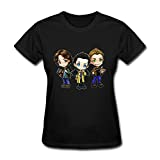

Product Title:  supernatural chibis sam dean castiel neck shirt women black 
Amazon Url: www.amzon.com/dp/B014ICB9A0


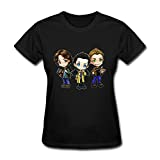

Product Title:  supernatural chibis sam dean castiel cotton shirt women black l 
Amazon Url: www.amzon.com/dp/B014ICBG9Y


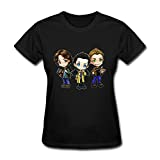

Product Title:  supernatural chibis sam dean castiel round neck tshirt woman black xxl 
Amazon Url: www.amzon.com/dp/B014ICBNQU


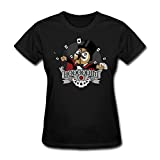

Product Title:  towi womens hoodini vanoss gaming oneck tees black 
Amazon Url: www.amzon.com/dp/B0177LX2J0


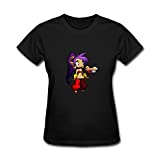

Product Title:  chengxingda womens shantae video games logo short sleeve tshirt xxl 
Amazon Url: www.amzon.com/dp/B01IMP76XI


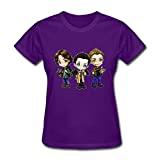

Product Title:  supernatural chibis sam dean castiel neck tshirts female purple l 
Amazon Url: www.amzon.com/dp/B014ICEJ1Q


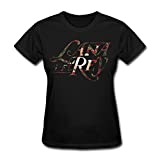

Product Title:  shjq womens tshirt cute lana del rey black size 
Amazon Url: www.amzon.com/dp/B016UPWSAI


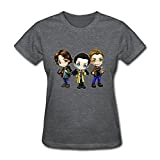

Product Title:  supernatural chibis sam dean castiel slim fit tshirt women deepheather xs 
Amazon Url: www.amzon.com/dp/B014ICD2D2


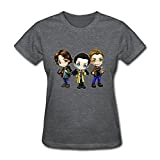

Product Title:  supernatural chibis sam dean castiel neck shirt female deepheather l 
Amazon Url: www.amzon.com/dp/B014ICDELM


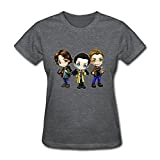

Product Title:  supernatural chibis sam dean castiel organic cotton shirts womens deepheather 
Amazon Url: www.amzon.com/dp/B014ICD9YO


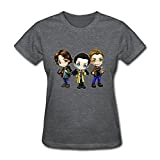

Product Title:  supernatural chibis sam dean castiel cotton shirts womens deepheather xxl 
Amazon Url: www.amzon.com/dp/B014ICDNZY


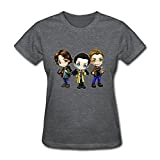

Product Title:  supernatural chibis sam dean castiel cotton tshirt women deepheather xl 
Amazon Url: www.amzon.com/dp/B014ICDIGI


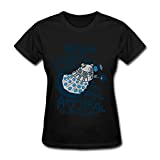

Product Title:  hnan lady doctor logo words cotton shirt black 
Amazon Url: www.amzon.com/dp/B0142LRSB6


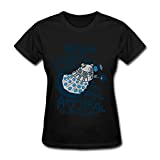

Product Title:  hnan womens doctor logo words oneck tshirts black xl 
Amazon Url: www.amzon.com/dp/B0142LRYRO


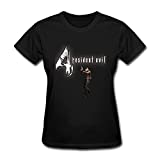

Product Title:  dasy womens neck resident evil 4 video game tee xlarge black 
Amazon Url: www.amzon.com/dp/B016BENSR0


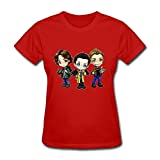

Product Title:  supernatural chibis sam dean castiel cotton shirt ladies red 
Amazon Url: www.amzon.com/dp/B014ICC10C


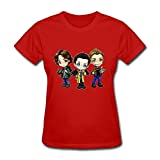

Product Title:  supernatural chibis sam dean castiel slim fit tshirts women red xxl 
Amazon Url: www.amzon.com/dp/B014ICCD3M


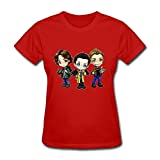

Product Title:  supernatural chibis sam dean castiel short sleeve shirts women red xs 
Amazon Url: www.amzon.com/dp/B014ICBSE2


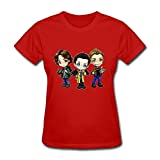

Product Title:  supernatural chibis sam dean castiel 100 cotton shirt women red l 
Amazon Url: www.amzon.com/dp/B014ICC6AC


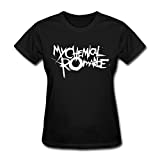

Product Title:  youshine womens american rock band chemical romance logo tshirt  xs black 
Amazon Url: www.amzon.com/dp/B014J8ZJ22


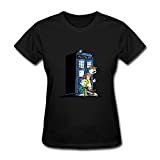

Product Title:  womens shirtfunny calvin hobbes doctor tv mixed black sizexl 
Amazon Url: www.amzon.com/dp/B01EGZXEJ8


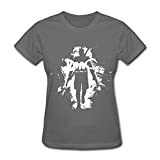

Product Title:  womens dmc devil may cry tshirt 
Amazon Url: www.amzon.com/dp/B0171NTXRE


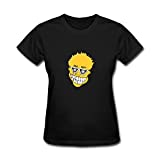

Product Title:  zhengxing womens toy dolls punk rock band logo short sleeve tshirt xxl colorname 
Amazon Url: www.amzon.com/dp/B01ISLOH5G


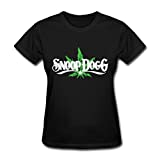

Product Title:  womans snoop dogg fan logo fashion soft shirts 
Amazon Url: www.amzon.com/dp/B01IJYVRQE


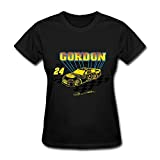

Product Title:  zeko womens tshirts jeff gordonnascar size black 
Amazon Url: www.amzon.com/dp/B017EM8D8M


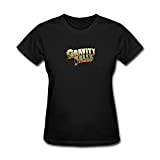

Product Title:  xiuluan womens gravity falls logo comedy tv tshirt size xxl colorname short sleeve 
Amazon Url: www.amzon.com/dp/B01IP65KYG


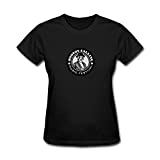

Product Title:  xiuluan womens boston calling music festival logo tshirt size xxl colorname short sleeve 
Amazon Url: www.amzon.com/dp/B01J3N7ZZC


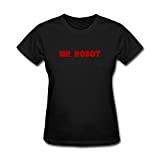

Product Title:  xiuluan womens mr robot logo tshirt size l colorname short sleeve 
Amazon Url: www.amzon.com/dp/B01IP63KYS


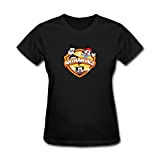

Product Title:  xiuluan womens animaniacs logo tshirt size colorname short sleeve 
Amazon Url: www.amzon.com/dp/B01J3NA2WA


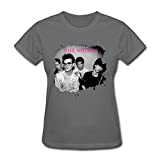

Product Title:  dasy womens neck smiths classic rock band shirt xxlarge deepheather 
Amazon Url: www.amzon.com/dp/B016D8HXBQ


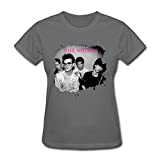

Product Title:  dasy womens neck smiths classic rock band shirts medium deepheather 
Amazon Url: www.amzon.com/dp/B016D8HRIK


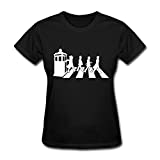

Product Title:  zeko womens tshirts doctor size black 
Amazon Url: www.amzon.com/dp/B0154H2HN6


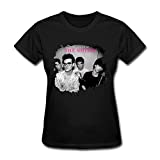

Product Title:  dasy womens neck smiths classic rock band tees small black 
Amazon Url: www.amzon.com/dp/B016D8HFJQ


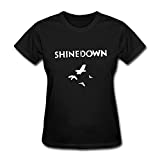

Product Title:  jiayuhua womens shinedown sound madness tshirt xl 
Amazon Url: www.amzon.com/dp/B014U6DDEE


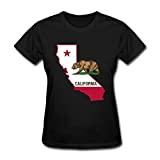

Product Title:  aimei girl california flag brand new unique shirts xl black 
Amazon Url: www.amzon.com/dp/B012KY4LIA


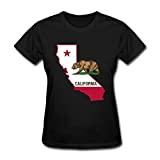

Product Title:  aimei women california flag best graphic normal fit tshirt xxl black 
Amazon Url: www.amzon.com/dp/B012KY4OQ4


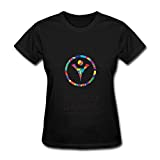

Product Title:  funny special olympics world sports games 2015 womens tshirt black size 
Amazon Url: www.amzon.com/dp/B01338MTHM


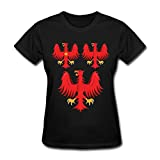

Product Title:  new military arms poland womens black short sleeve tshirt 
Amazon Url: www.amzon.com/dp/B01K76A2W2


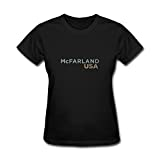

Product Title:  zhengxing womens mcfarland usa logo short sleeve tshirt xxl colorname 
Amazon Url: www.amzon.com/dp/B01KFRI07W


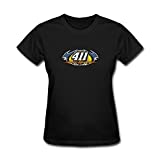

Product Title:  xiuluan womens 411 motor speedway race logo tshirt size xxl colorname short sleeve 
Amazon Url: www.amzon.com/dp/B01J3N55VI


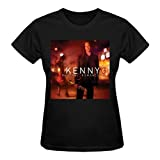

Product Title:  kenny g rhythm romance womens soft short sleeve crew neck tshirts black 
Amazon Url: www.amzon.com/dp/B01I8ZI4A6


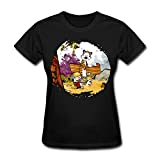

Product Title:  wxtee womens calvin hobbes hand painted animation tshirt size xs black 
Amazon Url: www.amzon.com/dp/B012GAD8H8


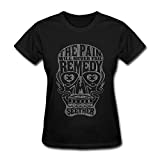

Product Title:  tea time womens tshirt geek seether skeleton skull black size xl 
Amazon Url: www.amzon.com/dp/B01624DTRI


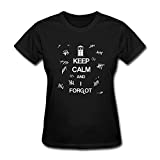

Product Title:  dasy womens neck doctor 3 shirts medium 
Amazon Url: www.amzon.com/dp/B01588N7VC


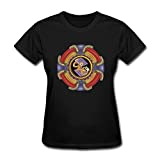

Product Title:  dasy womens neck electric light orchestra logo shirt xxlarge black 
Amazon Url: www.amzon.com/dp/B016EXUZC4


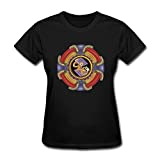

Product Title:  dasy womens neck electric light orchestra logo tees xlarge black 
Amazon Url: www.amzon.com/dp/B016EXUY20


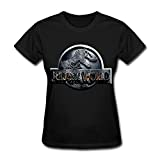

Product Title:  tike womens jurassic dino world 4 tshirt color black size xl 
Amazon Url: www.amzon.com/dp/B016OPN4OI


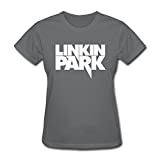

Product Title:  vansty linkin park short sleeves shirt women deepheather size xs 
Amazon Url: www.amzon.com/dp/B01BR69N8U


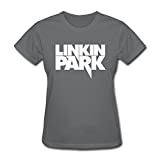

Product Title:  vansty linkin park round neck shirt lady deepheather size 
Amazon Url: www.amzon.com/dp/B01BR69OCA


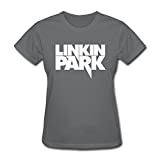

Product Title:  vansty linkin park 100 cotton shirt lady deepheather size l 
Amazon Url: www.amzon.com/dp/B01BR69QT6


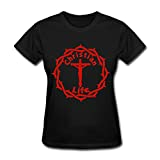

Product Title:  christian life jesus christ religious girl student black short sleeve tshirt 
Amazon Url: www.amzon.com/dp/B01K1M3QCK


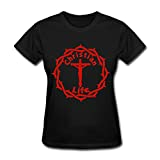

Product Title:  christian life jesus christ religious womens black short sleeve tshirts 
Amazon Url: www.amzon.com/dp/B01K1M3OKY


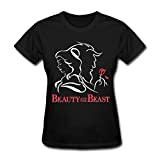

Product Title:  wxtee womens beauty beast movie new tshirt size xxl black 
Amazon Url: www.amzon.com/dp/B014FDJW3S


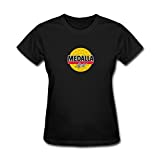

Product Title:  xiuluan womens medalla light logo tshirt size xxl colorname short sleeve 
Amazon Url: www.amzon.com/dp/B01J3NUVU8


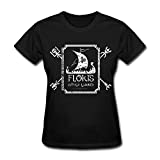

Product Title:  roro womens flokis ship yard scandanavia shirt vikings tshirts black xsmall 
Amazon Url: www.amzon.com/dp/B01BFAUDVO


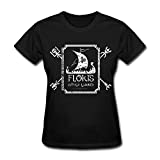

Product Title:  roro womens flokis ship yard scandanavia shirt vikings shirt black small 
Amazon Url: www.amzon.com/dp/B01BFAUEFO


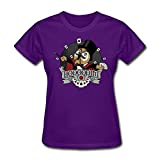

Product Title:  towi women hoodini vanoss gaming oneck shirt purple l 
Amazon Url: www.amzon.com/dp/B0177LZICY


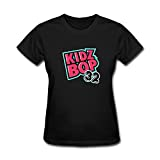

Product Title:  xiuluan womens kidz bop 32 kidz bop kids tshirt size l colorname short sleeve 
Amazon Url: www.amzon.com/dp/B01J3N59C8


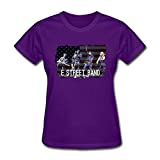

Product Title:  dasy womens neck e street band tee small purple 
Amazon Url: www.amzon.com/dp/B016KCJYQ2


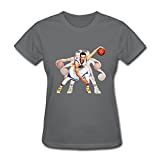

Product Title:  womens shirtsclassic stephen 30 curry basketball super star player deepheather sizexxl 
Amazon Url: www.amzon.com/dp/B01DBOYRFA


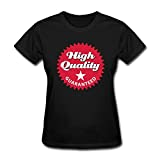

Product Title:  vansty high quality star 100 cotton shirt women black size xs 
Amazon Url: www.amzon.com/dp/B01EFSLXXU


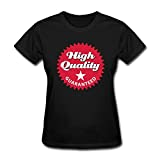

Product Title:  vansty high quality star short sleeves shirt women black size xl 
Amazon Url: www.amzon.com/dp/B01EFSM3Y8


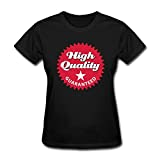

Product Title:  vansty high quality star 100 cotton tshirt women black size xxl 
Amazon Url: www.amzon.com/dp/B01EFSGL4G


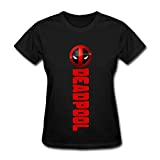

Product Title:  zeko womens tshirts deadpool 3 size l black 
Amazon Url: www.amzon.com/dp/B018QOCB2G


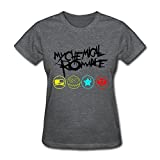

Product Title:  womens cute tshirt  chemical romance deepheather size 
Amazon Url: www.amzon.com/dp/B012NH1KEC


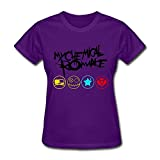

Product Title:  womens cute tshirts  chemical romance purple size xxl 
Amazon Url: www.amzon.com/dp/B014A4FMOK


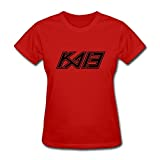

Product Title:  athlete originals womens tshirt keenan allen ka13 logo black digital print red 
Amazon Url: www.amzon.com/dp/B073X96V7T


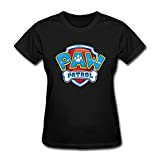

Product Title:  dasy womens neck tv series paw patrol shirt xlarge black 
Amazon Url: www.amzon.com/dp/B015J2XE56


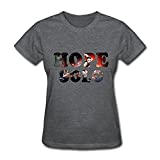

Product Title:  huba womens tees hope solo deepheather size xs 
Amazon Url: www.amzon.com/dp/B014CGNBPS


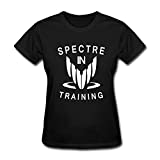

Product Title:  hnan womens mass effect spectre oneck tees black 
Amazon Url: www.amzon.com/dp/B012CHGL38


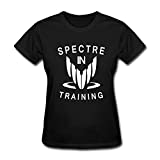

Product Title:  hnan womens mass effect spectre short sleeve tshirts black l 
Amazon Url: www.amzon.com/dp/B012CHGQB0


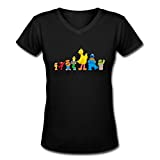

Product Title:  adults cotton custom sesame street live family v neck shirt black xxl 
Amazon Url: www.amzon.com/dp/B01LWTSLVC


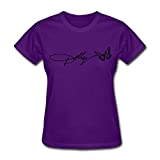

Product Title:  dolly parton logo woman comfy purple 
Amazon Url: www.amzon.com/dp/B01EL6978E


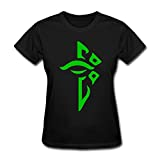

Product Title:  jiayuhua womens ingress enlightened resistance logo tshirt xxl 
Amazon Url: www.amzon.com/dp/B014XIUN9W


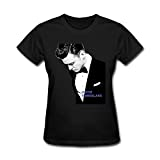

Product Title:  liyo women justin timberlake profile shirts black xxl 
Amazon Url: www.amzon.com/dp/B01FM4C1GE


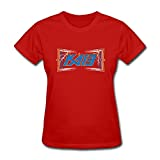

Product Title:  athlete originals womens tshirt keenan allen keenan allen logo navy  light  blue  yellow digital print red 
Amazon Url: www.amzon.com/dp/B073X9PFC2


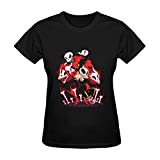

Product Title:  underfell skele bros womens diy customize tshirtblack xlargeblackxlargeblack 
Amazon Url: www.amzon.com/dp/B06X6KCJ6Z


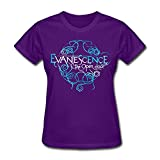

Product Title:  shjq womens tees cute black metal evanescence shine logo purple size l 
Amazon Url: www.amzon.com/dp/B017LE8ZQI


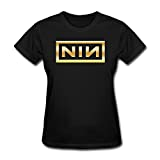

Product Title:  nine inch nails gold logo womens cotton tshirts black 
Amazon Url: www.amzon.com/dp/B01J15TIRA


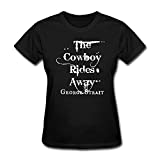

Product Title:  dasy womens neck george strait cowboy rides away tees small black 
Amazon Url: www.amzon.com/dp/B016D8F0FC


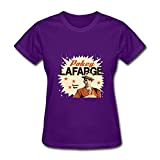

Product Title:  huba womens tshirt pokey lafarge purple size 
Amazon Url: www.amzon.com/dp/B017X00G6M


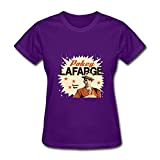

Product Title:  huba womens shirt pokey lafarge purple size xs 
Amazon Url: www.amzon.com/dp/B017X00EDW


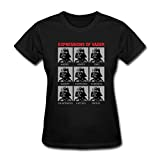

Product Title:  zhuyoudao custom star wars expressions darth vader shirts woman black xl 
Amazon Url: www.amzon.com/dp/B0191GF63E


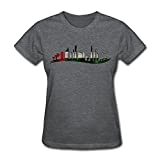

Product Title:  zeko womens tees united arab emirates flag dubai size l deepheather 
Amazon Url: www.amzon.com/dp/B013FMJ3QG


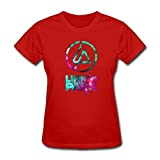

Product Title:  boais rock band linkin park logo woman custom short sleeve shirt 100 cotton 
Amazon Url: www.amzon.com/dp/B016BG4UMK


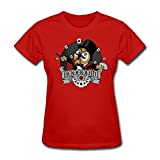

Product Title:  towi women hoodini vanoss gaming 100 cotton shirts red 
Amazon Url: www.amzon.com/dp/B0177LXJH0


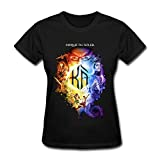

Product Title:  adult cirque du soleil ka neck shirt black 
Amazon Url: www.amzon.com/dp/B01H2YUJDY


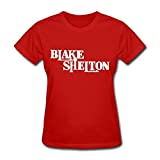

Product Title:  blake shelton new woman season red 
Amazon Url: www.amzon.com/dp/B01E6IGDAC


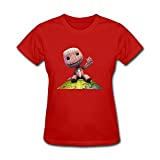

Product Title:  womens little big planet sack boy classic short sleeve tshirt 
Amazon Url: www.amzon.com/dp/B01GR3OQUS


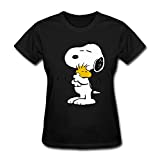

Product Title:  shfl womens snoopy woodstock oneck shirt black xs 
Amazon Url: www.amzon.com/dp/B0166856BW


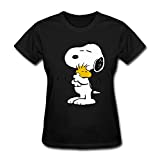

Product Title:  shfl womens snoopy woodstock short sleeve tshirts black xl 
Amazon Url: www.amzon.com/dp/B016685B9Y


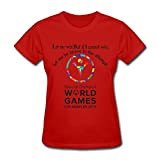

Product Title:  womens new 100 cotton  special olympics world games 2015 red size 
Amazon Url: www.amzon.com/dp/B012YX3I5E


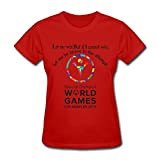

Product Title:  womens casual tshirt  special olympics world games 2015 red size xl 
Amazon Url: www.amzon.com/dp/B012YX3XTU


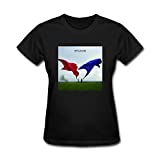

Product Title:  xiuluan womens biffy clyro revolutions tshirt size xl colorname short sleeve 
Amazon Url: www.amzon.com/dp/B01J3N8PCO


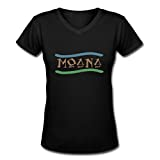

Product Title:  moana logo adults hot v neck shirt black xxl 
Amazon Url: www.amzon.com/dp/B01LX6H43D


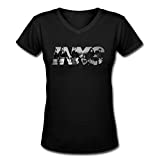

Product Title:  dasy womens v neck inxs tees large 
Amazon Url: www.amzon.com/dp/B016UFWPPQ


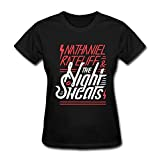

Product Title:  vansty nathaniel rateliff  night sweats 100 cotton shirt women black size xxl 
Amazon Url: www.amzon.com/dp/B01BR68YYO


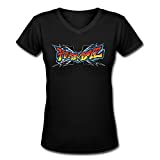

Product Title:  cling womens hardy boyz wwe logo vneck tshirt black 
Amazon Url: www.amzon.com/dp/B01A82FFBI


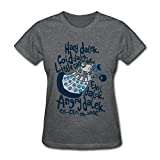

Product Title:  hnan lady doctor logo words cotton tshirts deepheather xs 
Amazon Url: www.amzon.com/dp/B0142LT93Q


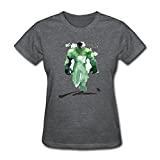

Product Title:  zhuyoudao woman custom avengers 2 hulk oneck tshirts 100 organic cotton deepheather 
Amazon Url: www.amzon.com/dp/B013D0PYC2


In [7]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo

def get_similar_products_cnn(doc_id, num_results):
    doc_id = asins.index(df_asins[doc_id])
    pairwise_dist = pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    for i in range(len(indices)):
        rows = data[['medium_image_url','title']].loc[data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            print('Amazon Url: www.amzon.com/dp/'+ asins[indices[i]])

get_similar_products_cnn(5, 100)

In [ ]:
# with GPU => per image 3.5/20 (0.175 sec), for whole data set its taking around 40min
# with CPU => per image 12.3/20 (0.615 sec), for whole data set its taking around 160min